In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline


In [2]:
sys.path.insert(0,'/mnt/meom/workdir/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/'
march_buoyfiles = sorted(glob.glob(database + 'filt-3D/NATL60-CJM165_y2013m03d*.1d_buoyancy_filt-n80-f0.0125.nc'))
march_wfiles = sorted(glob.glob(database + 'filt-3D/NATL60-CJM165_y2013m03d*.1d_vovecrtz_filt-n80-f0.0125.nc'))
march_mldfiles = sorted(glob.glob(database + 'MXL/NATL60-CJM165_y2013m03d*.1d_somxl010.nc'))
maskfile= '/mnt/meom/workdir/albert/NATL60/NATL60-I/NATL60-CJM165.1d_mask1-139_filt-n80-f0.0125.nc'

In [4]:
dep=xr.open_dataset(march_buoyfiles[0])['deptht']

In [5]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,0:139,jmin:jmax+1,imin:imax+1]
    return values


In [6]:
def Estimate_wb(box,buoy,w,tmask):
    buoy_box = get_values_in_box(box,buoy)
    w_box = get_values_in_box(box,w)  
    
    tmask_box = get_values_in_box(box,tmask)
    
    buoy_box_mask=ma.masked_where(tmask_box < 1, buoy_box)
    
    w_arr=w_box.values
    
    wb_box = np.squeeze(buoy_box_mask[0,:,:,:]*w_arr[0,:,:,:])
    avg_wb_box = np.nanmean(np.nanmean(wb_box,axis=2),axis=1)
    return avg_wb_box

In [7]:
def get_wb_in_boxes(buoyfiles,wfiles):
    global boxes
    _Ann_wb_arr = []
    for i in range(len(buoyfiles)): 
        print buoyfiles[i]
        buoy = xr.open_dataset(buoyfiles[i])['sobuoy']
        w = xr.open_dataset(wfiles[i])['vovecrtz']
        tmask = xr.open_dataset(maskfile)['tmask']
        _wb_arr=[]
        for box in boxes:
            print box.name
            wb = Estimate_wb(box,buoy,w,tmask)
            _wb_arr.append(wb)
        wb_arr = np.array(_wb_arr)
        _Ann_wb_arr.append(wb_arr)
    Ann_wb_arr = np.array(_Ann_wb_arr)
    return Ann_wb_arr

In [8]:
wb_boxes_march = get_wb_in_boxes(march_buoyfiles,march_wfiles)

/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m03d01.1d_buoyancy_filt-n80-f0.0125.nc
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m03d02.1d_buoyancy_filt-n80-f0.0125.nc
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m03d03.1d_buoyancy_filt-n80-f0.0125.nc
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m03d04.1d_buoyancy_filt-n80-f0.0125.nc
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m03d05.1d_buoyancy_filt-n80-f0.0125.nc
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4


In [9]:
def get_2Dvalues_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,jmin:jmax+1,imin:imax+1]
    return values


In [10]:
def Estimate_mld(box,mld):
    mld_box = get_2Dvalues_in_box(box,mld)
    avg_mld_box=np.nanmean(mld_box)
    return avg_mld_box

In [11]:
def get_mld_in_boxes(mldfiles):
    global boxes
    _Ann_mld_arr = []
    for i in range(len(mldfiles)): 
        print mldfiles[i]
        mld = xr.open_dataset(mldfiles[i])['somxl010']
        _mld_arr=[]
        for box in boxes:
            mldb = Estimate_mld(box,mld)
            _mld_arr.append(mldb)
        mld_arr = np.array(_mld_arr)
        _Ann_mld_arr.append(mld_arr)
    Ann_mld_arr = np.array(_Ann_mld_arr)
    return Ann_mld_arr

In [12]:
mld_boxes_march = get_mld_in_boxes(march_mldfiles)

/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d01.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d02.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d03.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d04.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d05.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d06.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d07.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d08.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d09.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m03d10.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-C

In [13]:
wb_boxes_march.shape

(31, 14, 139)

In [14]:
mld_boxes_march.shape

(31, 14)

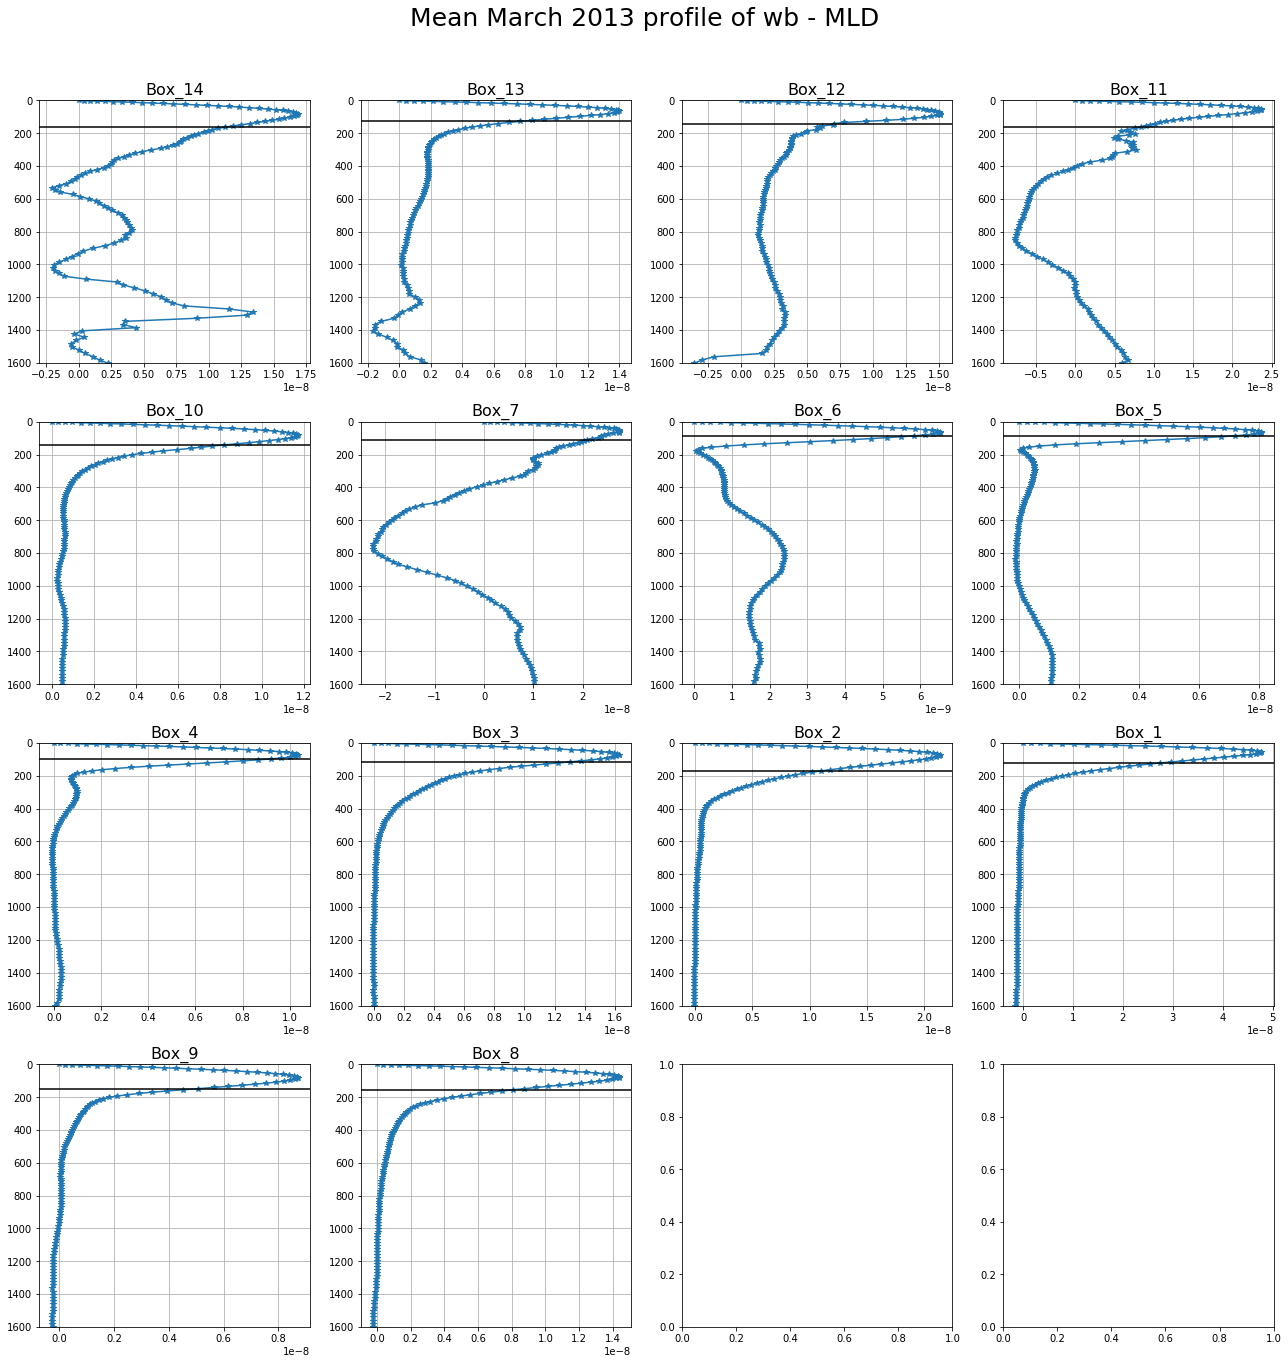

In [15]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean March 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_boxes_march[:,k,:],0),dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    axs[i].axhline(y=np.nanmean(mld_boxes_march[:,k]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_march13.png")

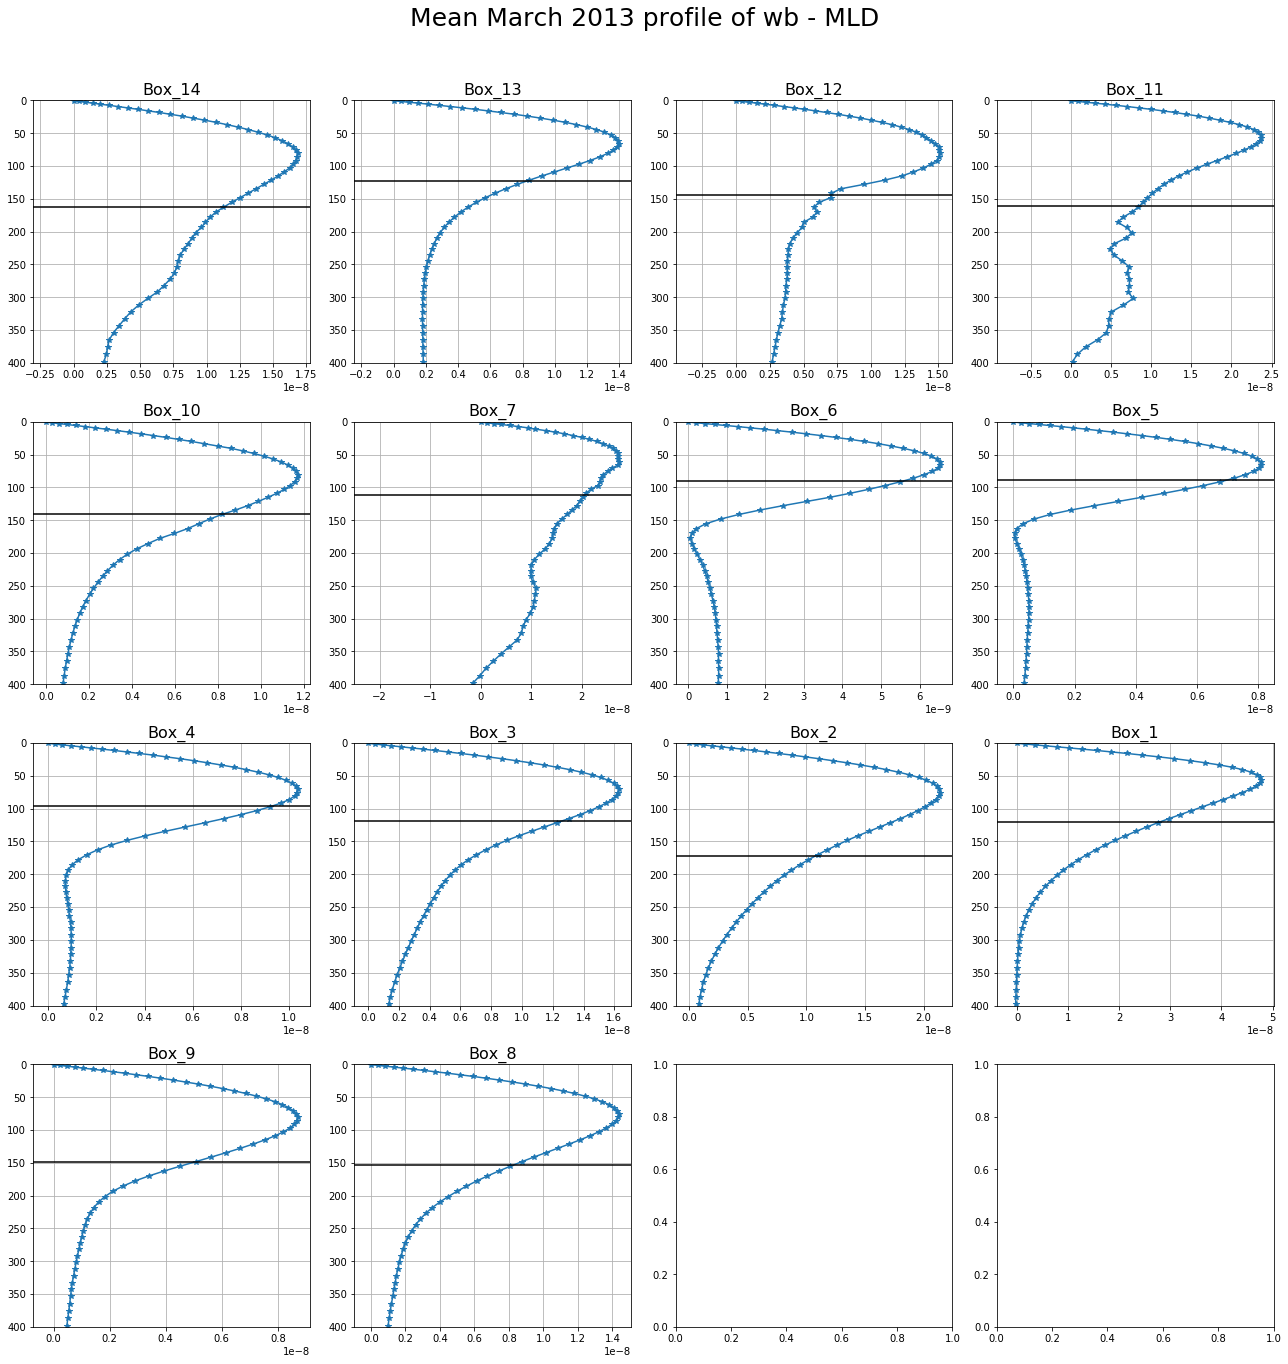

In [16]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean March 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_boxes_march[:,k,:],0),dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(400,0)
    axs[i].axhline(y=np.nanmean(mld_boxes_march[:,k]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_march13_surf.png")

In [60]:
for k,box in enumerate(boxes):
    print k, box.name

0 Box_14
1 Box_13
2 Box_12
3 Box_11
4 Box_10
5 Box_7
6 Box_6
7 Box_5
8 Box_4
9 Box_3
10 Box_2
11 Box_1
12 Box_9
13 Box_8


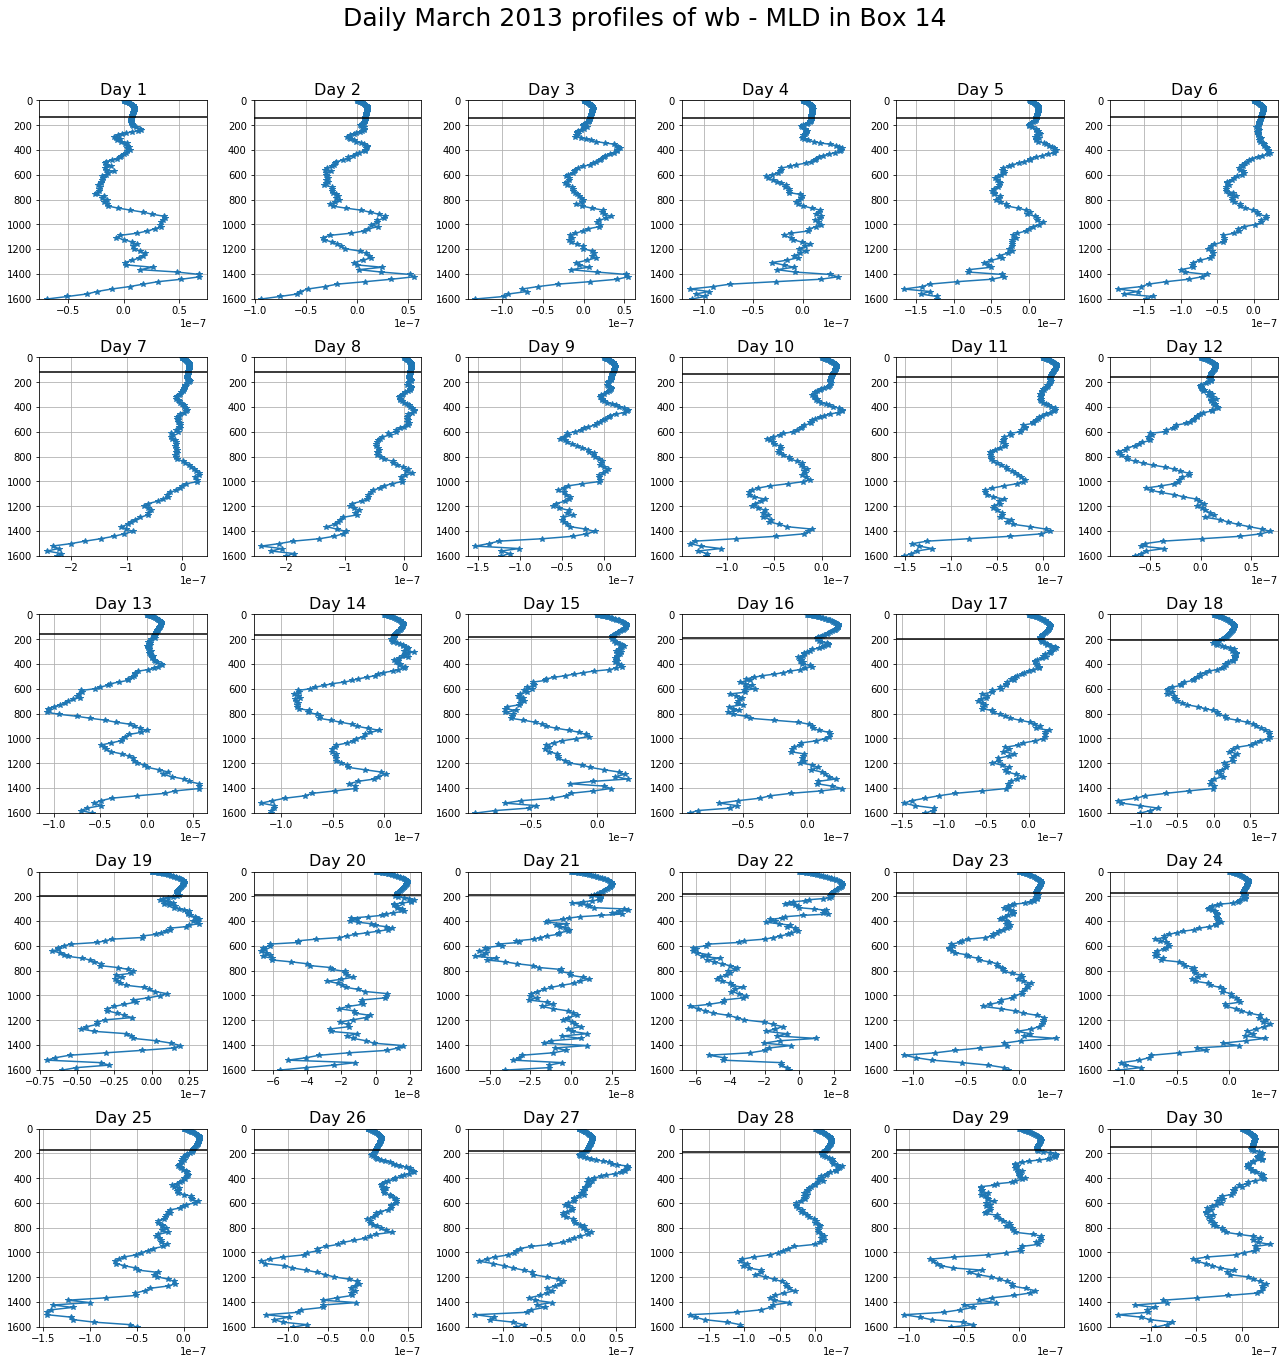

In [61]:
fig, axs = plt.subplots(5,6, figsize=(18, 18))
axs = axs.ravel()
title = 'Daily March 2013 profiles of wb - MLD in Box 14'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for day in range(len(march_mldfiles)-1):
    axs[i].plot(wb_boxes_march[day,0,:],dep,'C0*-')
    axs[i].set_title('Day '+str(day+1),size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    axs[i].axhline(y=mld_boxes_march[day,0],color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_march13_day_box14.png")

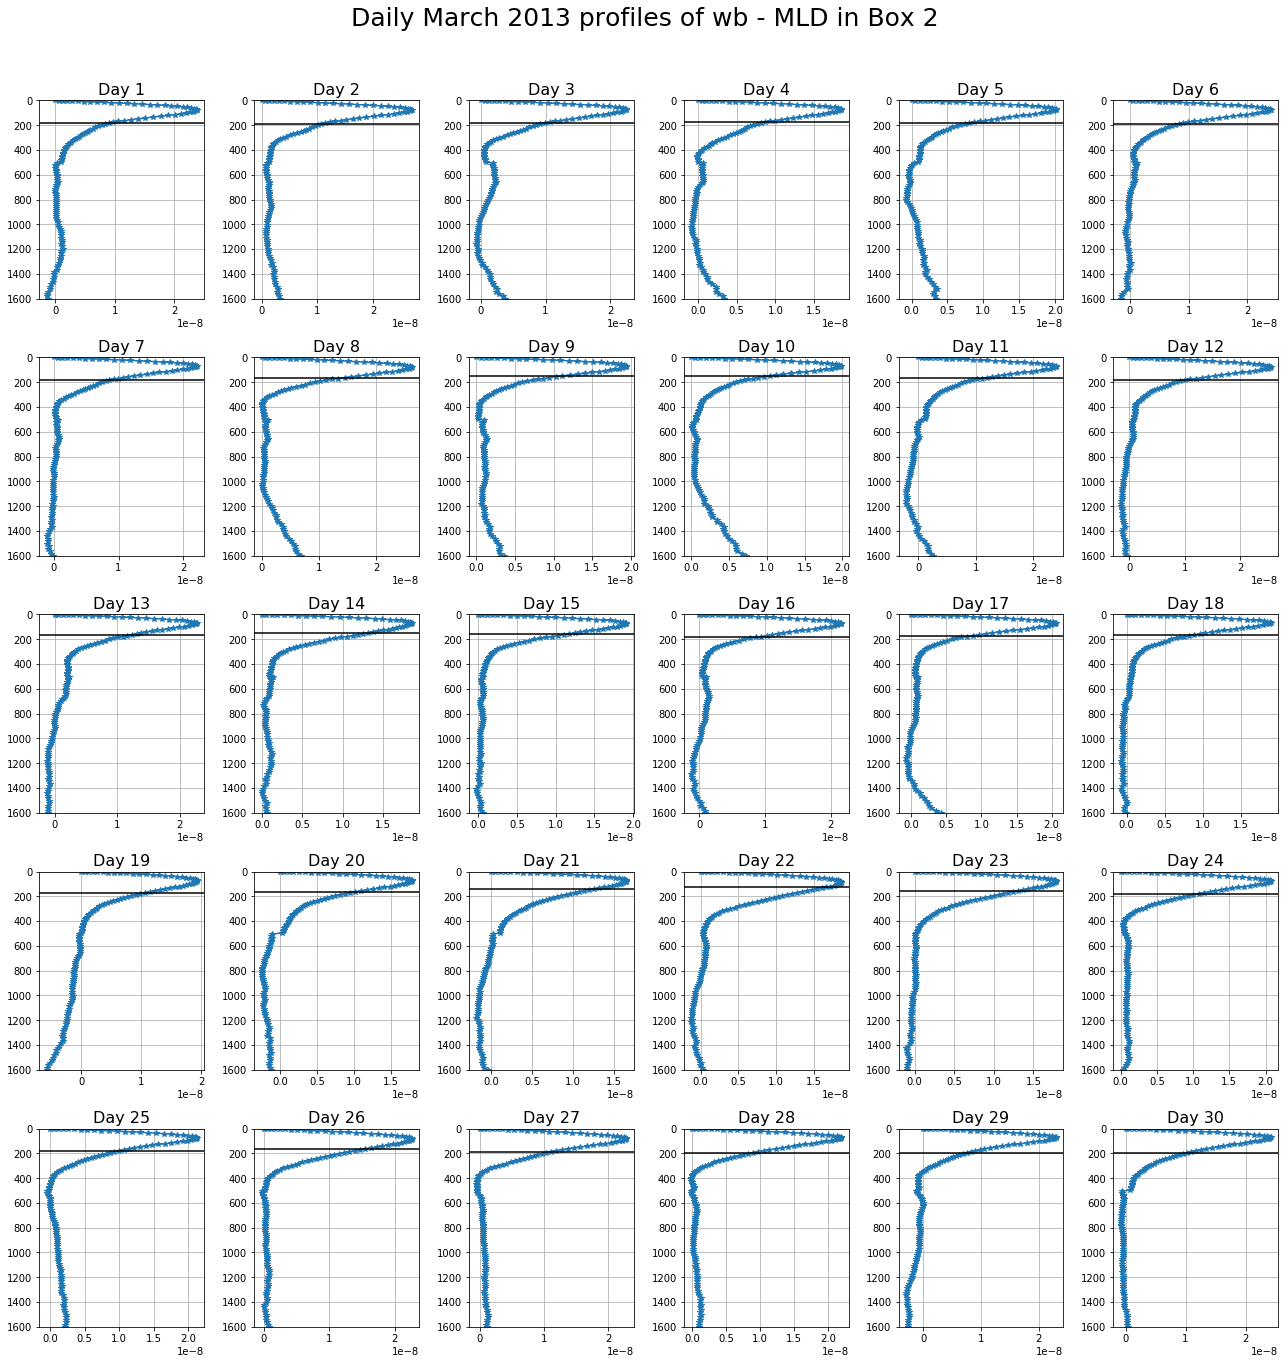

In [62]:
fig, axs = plt.subplots(5,6, figsize=(18, 18))
axs = axs.ravel()
title = 'Daily March 2013 profiles of wb - MLD in Box 2'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for day in range(len(march_mldfiles)-1):
    axs[i].plot(wb_boxes_march[day,10,:],dep,'C0*-')
    axs[i].set_title('Day '+str(day+1),size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    axs[i].axhline(y=mld_boxes_march[day,10],color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_march13_day_box2.png")

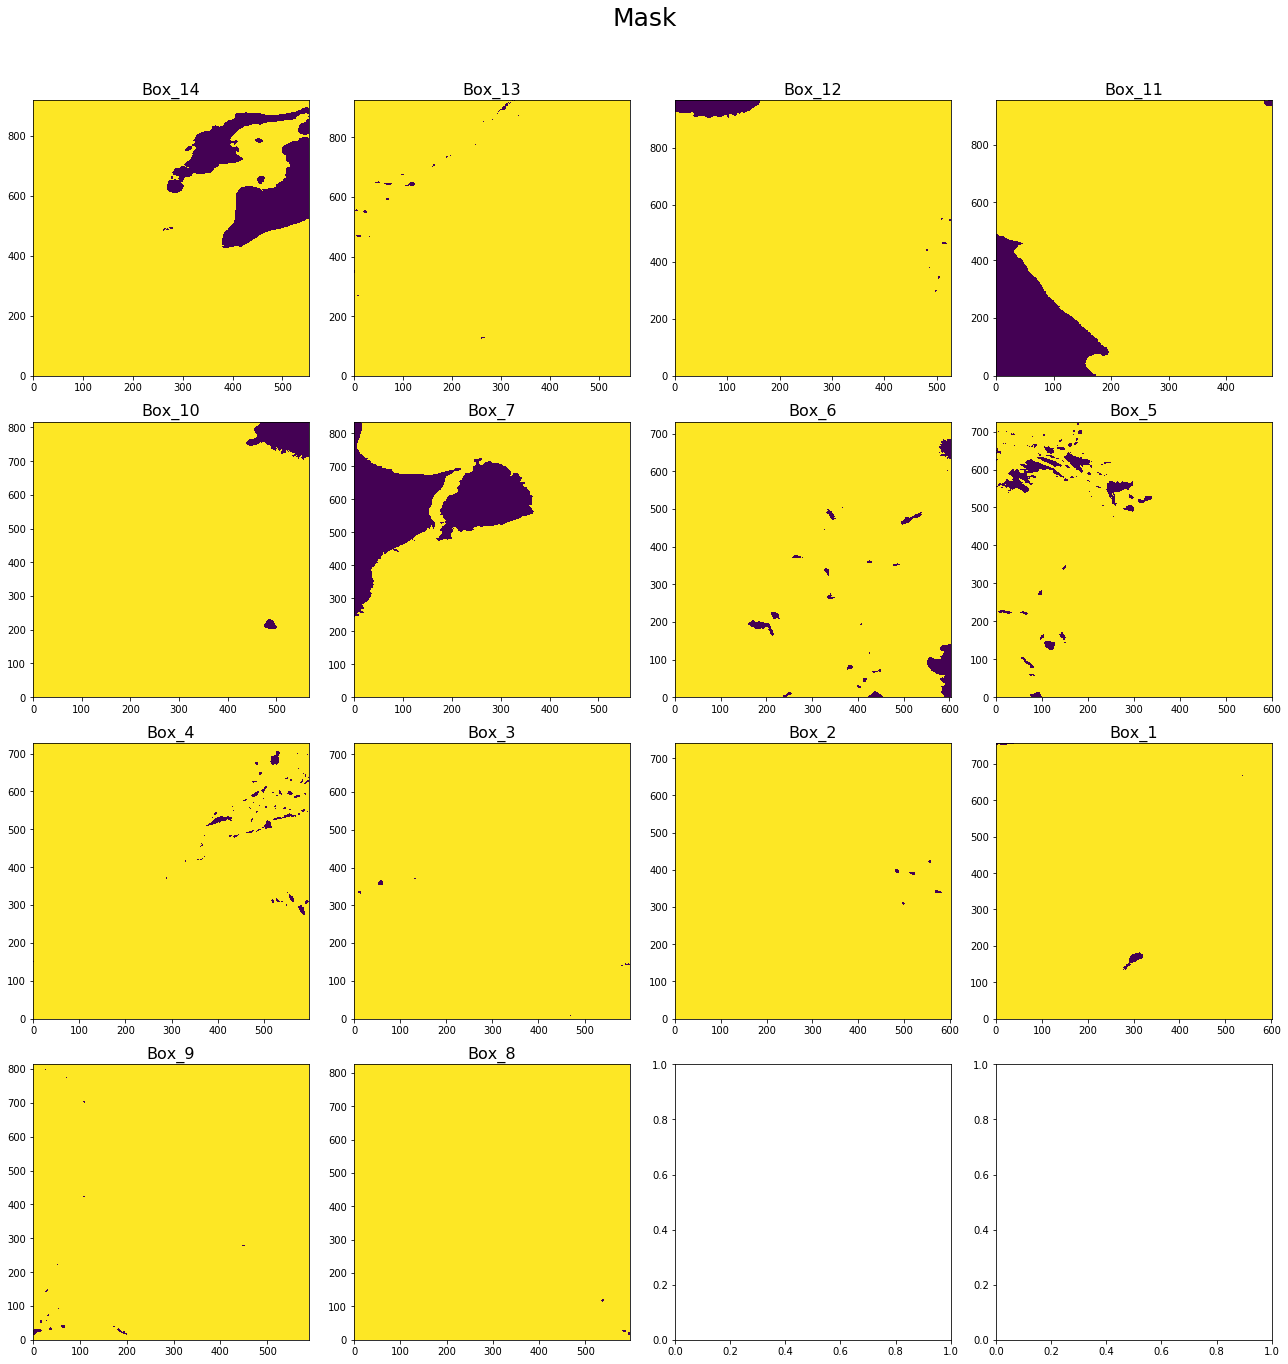

In [66]:
tmask = xr.open_dataset(maskfile)['tmask']

fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mask 1000m'
plt.suptitle(title,size = 25,y=1.05)
i = 0

for k,box in enumerate(boxes):
    mask=get_values_in_box(box,tmask)
    pcolor=axs[i].pcolormesh(mask[0,107,:,:],vmin=0,vmax=1)
    axs[i].set_title(box.name,size=16)
    i = i + 1
    fig.tight_layout()


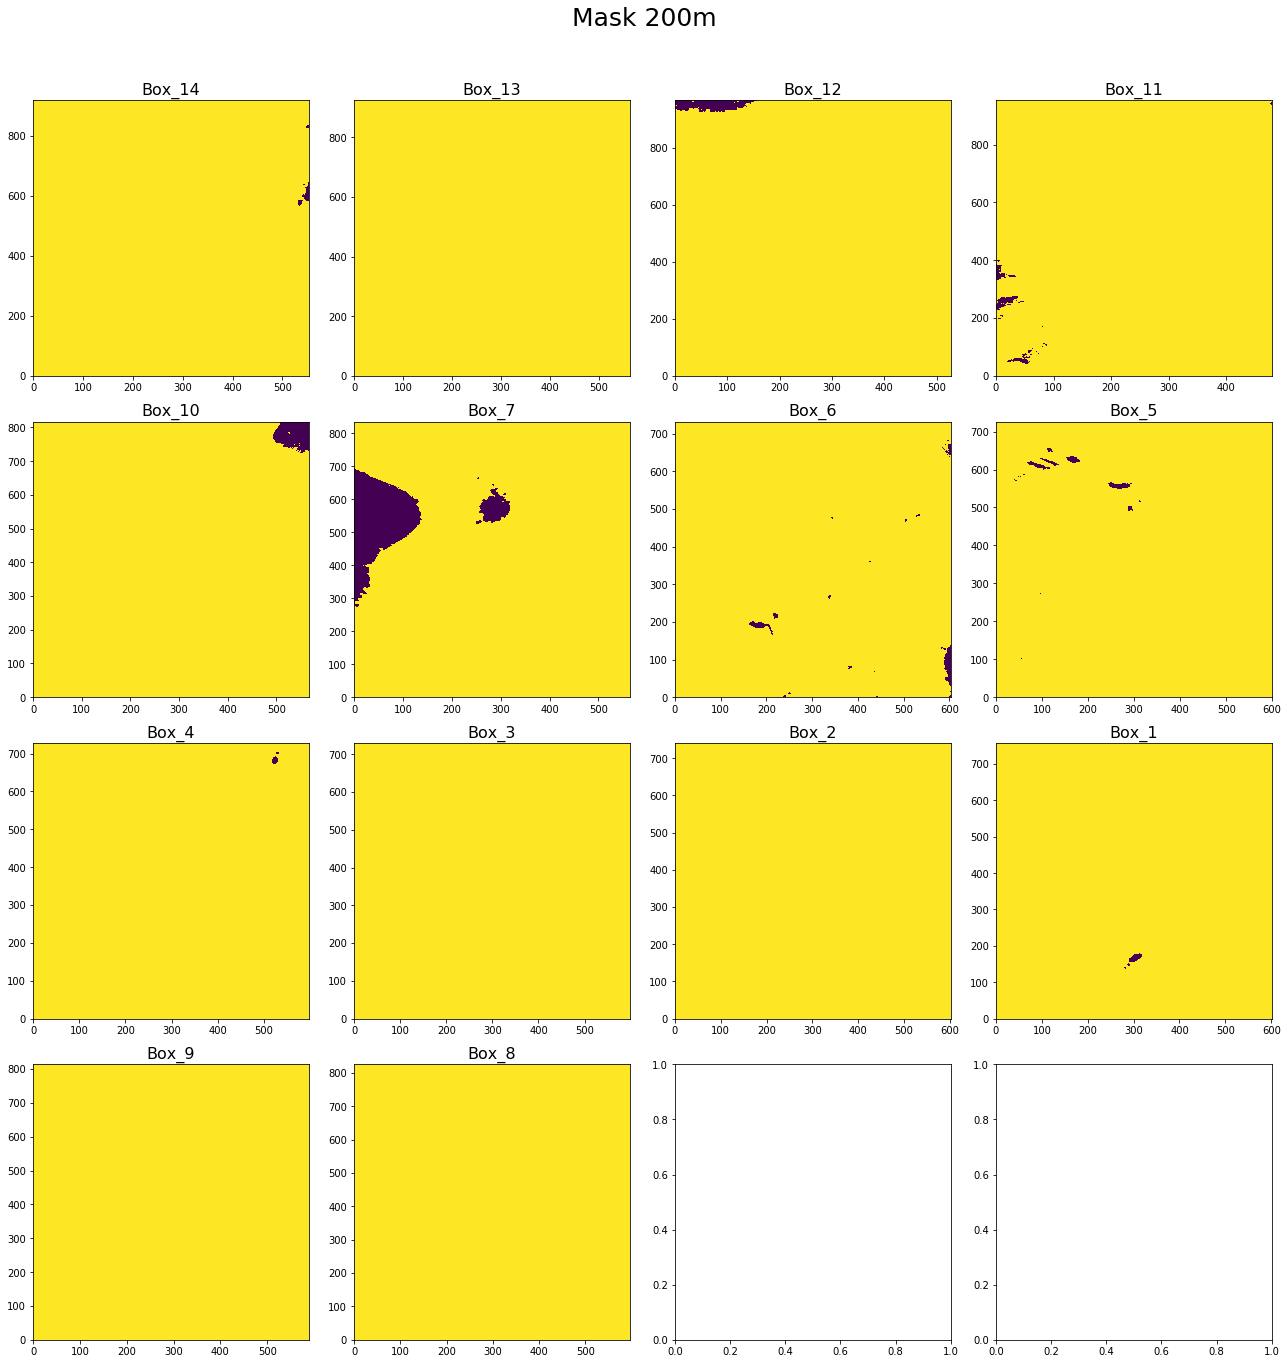

In [67]:
tmask = xr.open_dataset(maskfile)['tmask']

fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mask 200m'
plt.suptitle(title,size = 25,y=1.05)
i = 0

for k,box in enumerate(boxes):
    mask=get_values_in_box(box,tmask)
    pcolor=axs[i].pcolormesh(mask[0,45,:,:],vmin=0,vmax=1)
    axs[i].set_title(box.name,size=16)
    i = i + 1
    fig.tight_layout()
